bagging：随机森林

In [1]:
import numpy as np
import pandas as pd

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

/Users/pan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomizedSearchCV took 5.81 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.818 (std: 0.032)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: 0.816 (std: 0.022)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 9}

Model with rank: 3
Mean validation score: 0.809 (std: 0.029)
Parameters: {'bootstrap': False, 'criterion': 'mae', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 10}

GridSearchCV took 63.34 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.845 (std: 0.026)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.836 (std: 

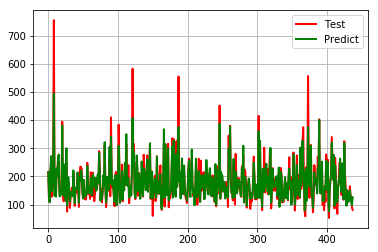

============================grid_search=========================================
Mean Squared Error is: 683.7392552028666
Root Mean Squared Error is: 26.148408272835013


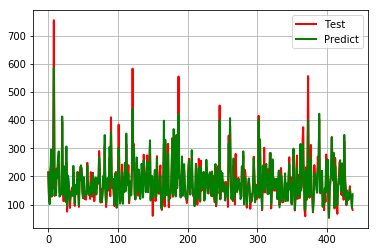

In [2]:
data=pd.read_csv("./data/datatrain.csv",encoding = "GBK")
#分割测试数据和训练数据
test, train = train_test_split(data, train_size=0.3, random_state=1)

#训练数据
y=train['tag']
X=train
del train['tag']

#测试数据
TagTest=test['tag']
XdataTest=test
del XdataTest['tag']


# 使用随机森林作为分类器，分类器有20课树
clf = RandomForestRegressor(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# 设置可能学习的参数
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# 随机搜索， randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
#起始时间
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
print("=============================================")

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# 网格搜索， grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

#对比分类效果
#random_search
#预测结果        
print("============================random_search=========================================")
Result = random_search.predict(XdataTest)
mse = np.average((Result - np.array(TagTest)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print ("Mean Squared Error is:",mse)
print ("Root Mean Squared Error is:",rmse)

t = np.arange(len(XdataTest))
plt.figure()
plt.plot(t, TagTest, 'r-', linewidth=2, label='Test')
plt.plot(t, Result, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#预测结果        
print("============================grid_search=========================================")
Result = grid_search.predict(XdataTest)
mse = np.average((Result - np.array(TagTest)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print ("Mean Squared Error is:",mse)
print ("Root Mean Squared Error is:",rmse)
plt.figure()
t = np.arange(len(XdataTest))
plt.plot(t, TagTest, 'r-', linewidth=2, label='Test')
plt.plot(t, Result, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()
refgrid_search=grid_search
refrandom_search=random_search